#### Install libraries

In [27]:
%pip istall pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install joblib

ERROR: unknown command "istall" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install pandas scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [42]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


#### Import libraries

In [43]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

####  Download NLTK 

In [31]:
# nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/luco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/luco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/luco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Load the dataset

In [32]:
# dataset
data = pd.read_csv("./electronics_data.csv")

#### Data Preprocessing

In [33]:
# data propocessing

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text_'].apply(preprocess_text)

#### Feature Engineering

In [34]:
# Feature Engineering
X = data['clean_text']
y = data['label']

#### Split data into train and test sets

In [35]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####  Define pipeline

In [36]:
# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

#### Define hyperparameters grid for grid search

In [37]:
# Define hyperparameters grid for grid search
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

#### Grid search for hyperparameter tuning

In [38]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END clf__C=0.1, tfidf__max_features=2000, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'tfidf__max_features': [1000, 2000, 3000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

#### Best hyperparameters

In [39]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'clf__C': 10, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}


#### Evaluate model

In [40]:
# evaluate model
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          CG       0.90      0.88      0.89       419
          OR       0.87      0.89      0.88       379

    accuracy                           0.89       798
   macro avg       0.89      0.89      0.89       798
weighted avg       0.89      0.89      0.89       798

Accuracy: 0.8859649122807017


#### Save the model

In [41]:
# Save the model
joblib.dump(grid_search, 'fake_review_detection_model.pkl')
print("Model saved successfully!")

Model saved successfully!


#### Visualization

#### Visualize class distribution in the dataset

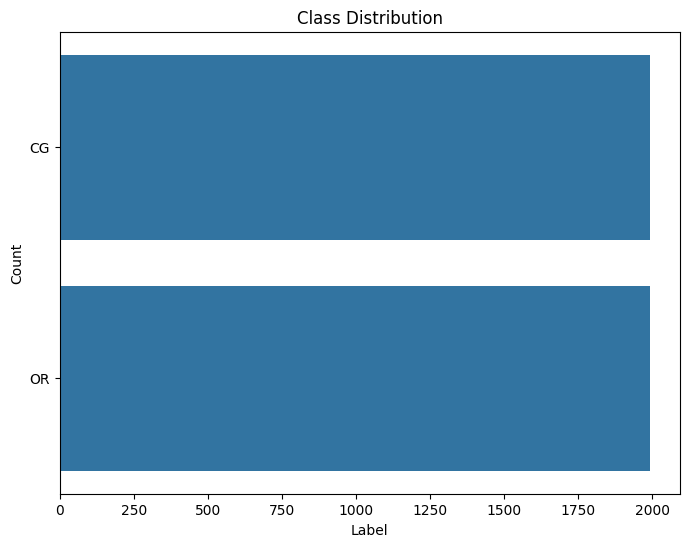

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data['label'])
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### Visualize the distribution of text lengths


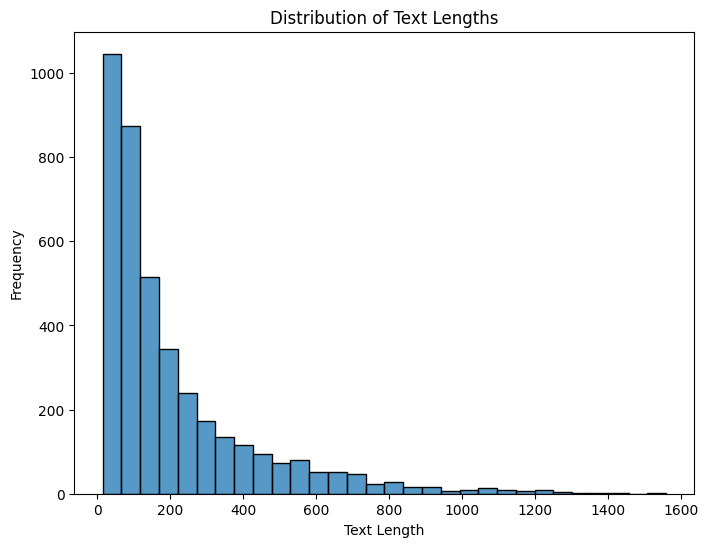

In [45]:
text_lengths = data['clean_text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

#### visualize the hyperparameters' effect on model performance

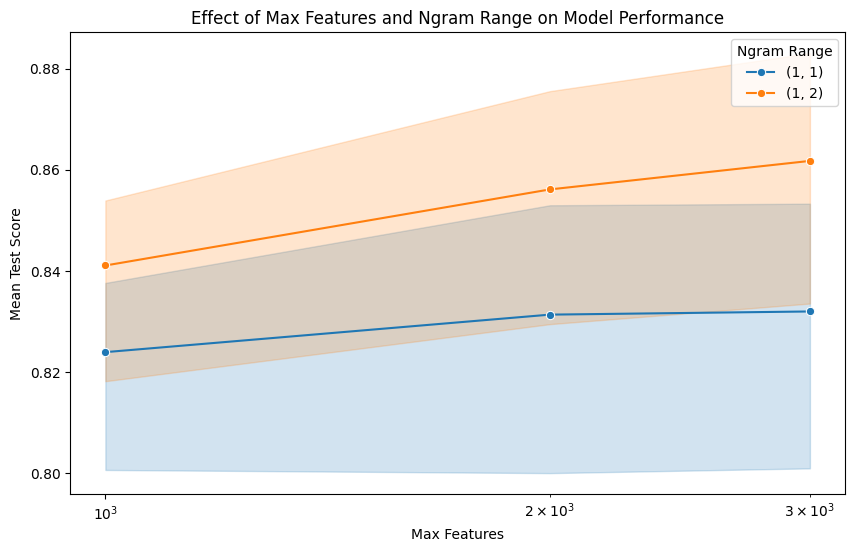

In [46]:
param_results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(data=param_results, x='param_tfidf__max_features', y='mean_test_score', hue='param_tfidf__ngram_range', marker='o')
plt.xscale('log')
plt.title('Effect of Max Features and Ngram Range on Model Performance')
plt.xlabel('Max Features')
plt.ylabel('Mean Test Score')
plt.legend(title='Ngram Range')
plt.show()